In [2]:
%pip install opendatasets 
%pip install seaborn
%pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd 
import seaborn as sns
import opendatasets as od
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, recall_score
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
# Faz o download do dataset # URL do dataset no Kaggle 
# od.download("https://www.kaggle.com/datasets/hassan06/nslkdd/data")

Dataset URL: https://www.kaggle.com/datasets/hassan06/nslkdd


100%|██████████| 13.9M/13.9M [00:01<00:00, 9.19MB/s]


In [5]:
# Substitua o caminho com o local onde o arquivo foi baixado/descompactado
dataset_path = 'nslkdd/KDDTrain+.txt'

# Carregar o dataset (defina corretamente o separador, se necessário)
df = pd.read_csv(dataset_path, header=None)

In [6]:
df.head()


,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125973 non-null  int64  
 1   1       125973 non-null  object 
 2   2       125973 non-null  object 
 3   3       125973 non-null  object 
 4   4       125973 non-null  int64  
 5   5       125973 non-null  int64  
 6   6       125973 non-null  int64  
 7   7       125973 non-null  int64  
 8   8       125973 non-null  int64  
 9   9       125973 non-null  int64  
 10  10      125973 non-null  int64  
 11  11      125973 non-null  int64  
 12  12      125973 non-null  int64  
 13  13      125973 non-null  int64  
 14  14      125973 non-null  int64  
 15  15      125973 non-null  int64  
 16  16      125973 non-null  int64  
 17  17      125973 non-null  int64  
 18  18      125973 non-null  int64  
 19  19      125973 non-null  int64  
 20  20      125973 non-null  int64  
 21  21      12

In [8]:
df.describe()


,0,4,5,6,7,8,9,10,11,12,...,32,33,34,35,36,37,38,39,40,42
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [10]:

df.isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
dtype: int64

In [14]:
print(df.columns)


Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42],
      dtype='int64')


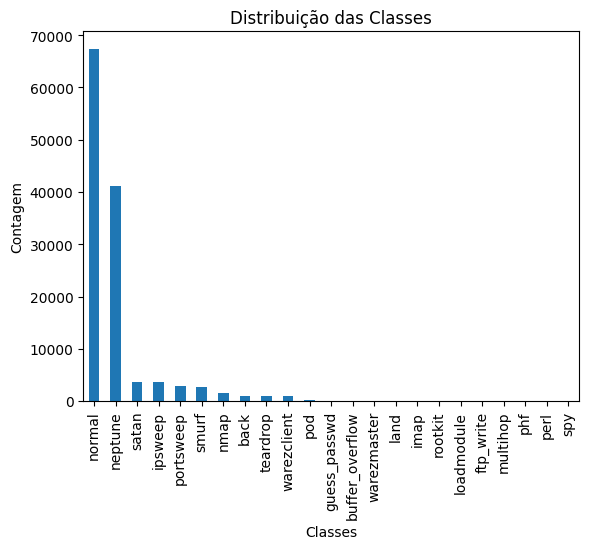

In [15]:
# Substitua pela coluna que representa a classe (exemplo: df['label'])
df[41].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()
